In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the data
data = pd.read_csv('cleaned_hate_crime.csv')

In [15]:
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,Anti-Multiple Religions,Anti-Native Hawaiian or Other Pacific Islander,Anti-Other Christian,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Sikh,Anti-Transgender,Anti-White
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,0
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,1
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,1
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,1
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236284,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,0,0,0,0,0,0,0,0,0,1
236285,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,0,0,0,0,0,0,0,0,0,0
236286,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,0,0,0,0,0,0,0,0,0,0
236287,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236289 entries, 0 to 236288
Data columns (total 62 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   incident_id                                     236289 non-null  int64  
 1   data_year                                       236289 non-null  int64  
 2   ori                                             236289 non-null  object 
 3   pug_agency_name                                 236289 non-null  object 
 4   agency_type_name                                236289 non-null  object 
 5   state_abbr                                      236289 non-null  object 
 6   state_name                                      236289 non-null  object 
 7   division_name                                   236289 non-null  object 
 8   region_name                                     236289 non-null  object 
 9   population_group_code     

In [17]:
# Convert the incident_date to datetime
data['incident_date'] = pd.to_datetime(data['incident_date'])

In [18]:
# add a new column for year
data['year'] = data['incident_date'].dt.year

In [19]:
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,Anti-Native Hawaiian or Other Pacific Islander,Anti-Other Christian,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Sikh,Anti-Transgender,Anti-White,year
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,1991
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,1,1991
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,1,1991
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,1,1991
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,0,0,0,0,0,0,0,0,0,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236284,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,0,0,0,0,0,0,0,0,1,2022
236285,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,0,0,0,0,0,0,0,0,0,2022
236286,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,0,0,0,0,0,0,0,0,0,2022
236287,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,0,0,0,0,0,0,0,0,0,2022


# Time Series Analysis

## Number of Hate Crimes by State

### Number of Hate Crimes by State for all states

In [20]:
# Number of Hate Crimes by State
df_state = data.groupby('state_name').size().reset_index(name='Number of incidents')
df_state

,state_name,Number of incidents
0,Alabama,725
1,Alaska,254
2,Arizona,7096
3,Arkansas,1156
4,California,39024
5,Colorado,4931
6,Connecticut,3816
7,Delaware,952
8,District of Columbia,1803
9,Federal,129


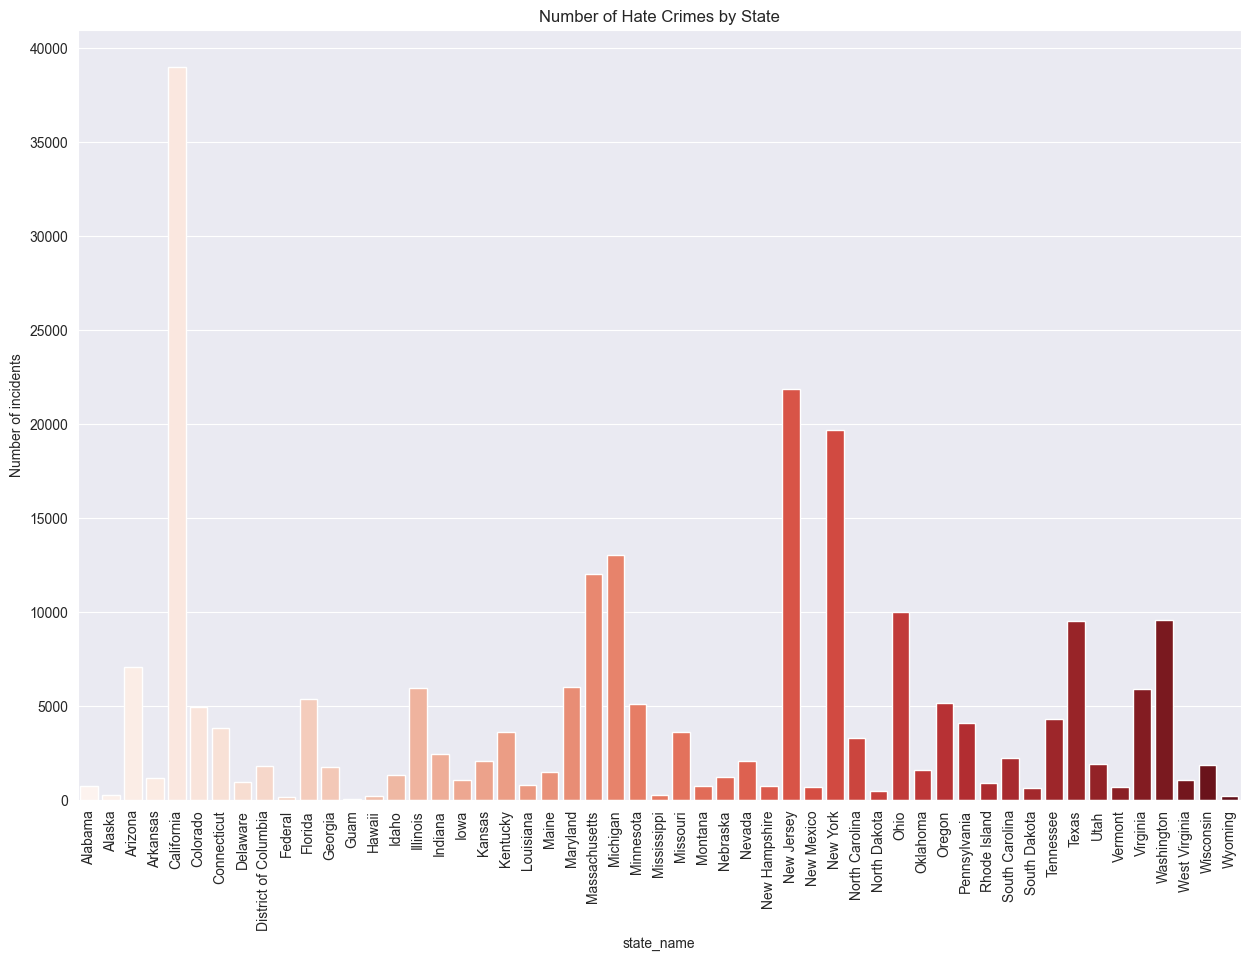

In [21]:
# plot the number of incidents by state
plt.figure(figsize=(15, 10))
# rotate the x-axis labels by 90 degrees
sns.barplot(data=df_state, x='state_name', y='Number of incidents', palette='Reds', hue='state_name')
plt.xticks(rotation=90)
plt.title('Number of Hate Crimes by State')
plt.show()

In [22]:
# plot summary statistics
df_state.describe()

,Number of incidents
count,53.000000
mean,4458.283019
std,6695.809885
min,25.000000
25%,779.000000
50%,1882.000000
75%,5150.000000
max,39024.000000


### Number of Hate Crimes by State for the top 10 states

In [40]:
# find the top 10 states with the highest number of incidents 
top_10_states = df_state.sort_values(by='Number of incidents', ascending=False).head(10)
top_10_states

,state_name,Number of incidents
4,California,39024
32,New Jersey,21859
34,New York,19704
24,Michigan,13052
23,Massachusetts,11993
37,Ohio,10021
49,Washington,9570
45,Texas,9517
2,Arizona,7096
22,Maryland,6004


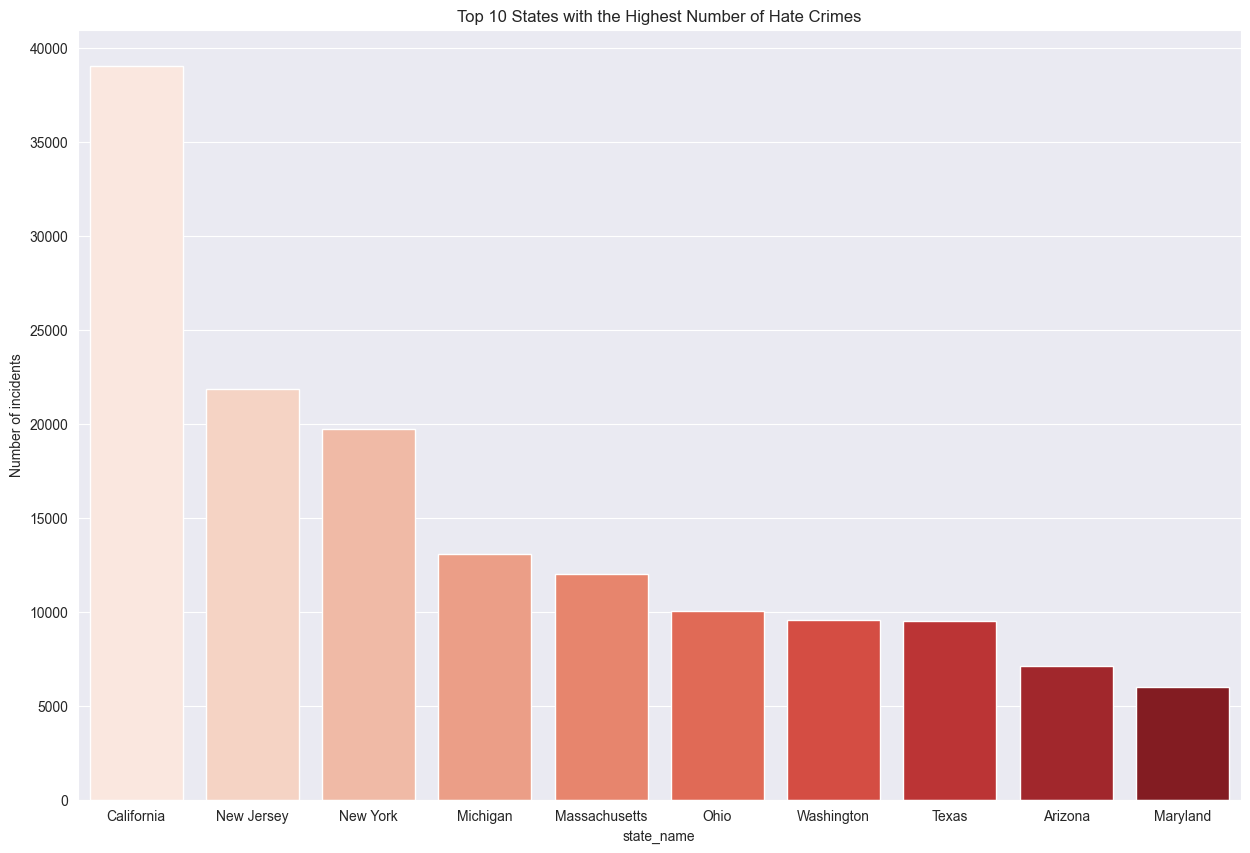

In [41]:
# plot the top 10 states with the highest number of incidents
plt.figure(figsize=(15, 10))
sns.barplot(data=top_10_states, x='state_name', y='Number of incidents', palette='Reds', hue='state_name')
plt.title('Top 10 States with the Highest Number of Hate Crimes')
plt.show()


In [43]:
# find the number of incidents by state per year for the top 10 states
df_state_year = data.groupby(['state_name', 'year']).size().reset_index(name='Number of incidents')

# find the number of incidents by state per year for the top 10 states
df_state_year = df_state_year[df_state_year['state_name'].isin(top_10_states['state_name'])]
df_state_year

,state_name,year,Number of incidents
50,Arizona,1991,48
51,Arizona,1992,172
52,Arizona,1993,208
53,Arizona,1994,205
54,Arizona,1995,220
...,...,...,...
1454,Washington,2018,515
1455,Washington,2019,479
1456,Washington,2020,459
1457,Washington,2021,590


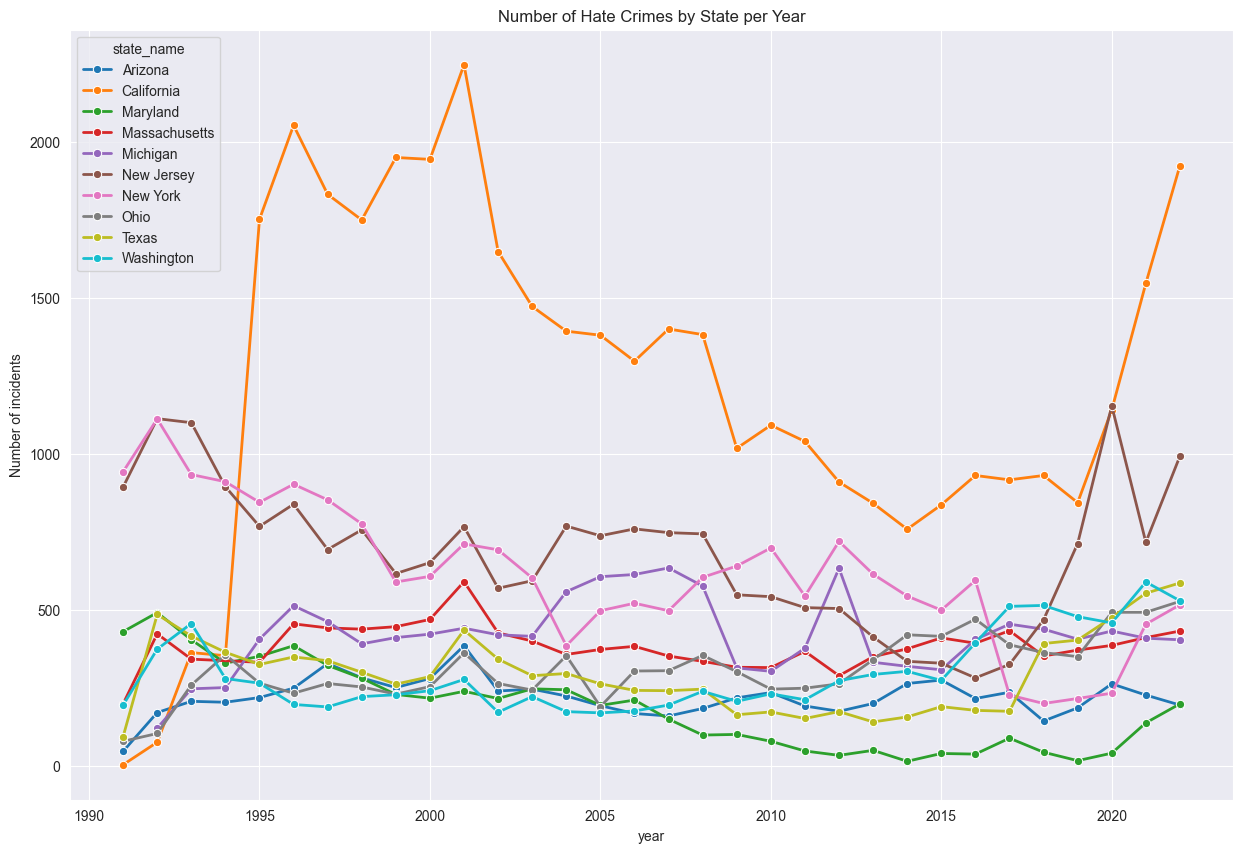

In [44]:
# plot the number of incidents by state per year for the top 10 states
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_state_year, x='year', y='Number of incidents', hue='state_name', linewidth=2, marker='o')
plt.title('Number of Hate Crimes by State per Year')
plt.show()

### Rolling Average of Hate Crimes by State for the top 10 states

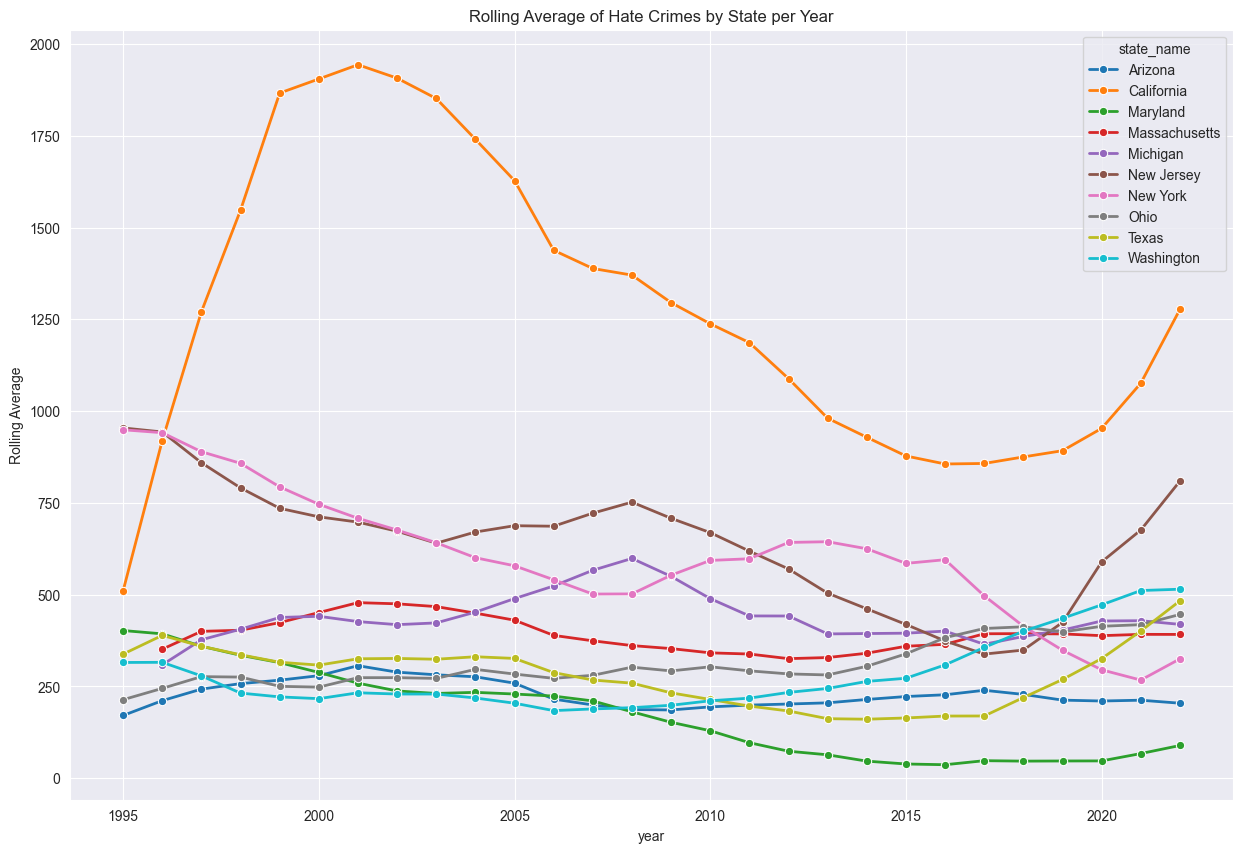

In [45]:
# plot the rolling average of hate crimes by state for the top 10 states
plt.figure(figsize=(15, 10))
df_state_year['Rolling Average'] = df_state_year.groupby('state_name')['Number of incidents'].transform(lambda x: x.rolling(5).mean())
sns.lineplot(data=df_state_year, x='year', y='Rolling Average', hue='state_name', linewidth=2, marker='o')
plt.title('Rolling Average of Hate Crimes by State per Year')
plt.show()

### The first order difference of the number of hate crimes by state for the top 10 states

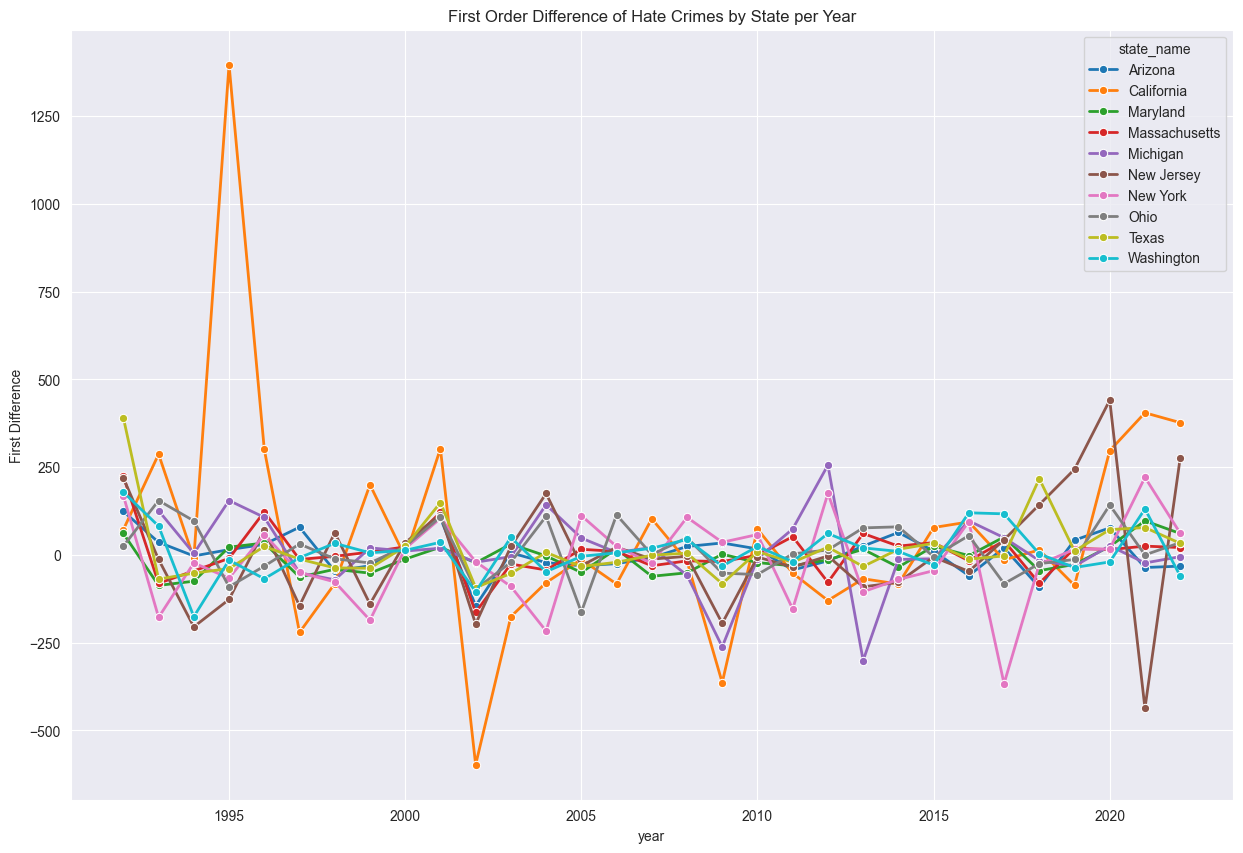

In [46]:
# plot the first order difference of hate crimes by state for the top 10 states
plt.figure(figsize=(15, 10))
df_state_year['First Difference'] = df_state_year.groupby('state_name')['Number of incidents'].transform(lambda x: x.diff())
sns.lineplot(data=df_state_year, x='year', y='First Difference', hue='state_name', linewidth=2, marker='o')
plt.title('First Order Difference of Hate Crimes by State per Year')
plt.show()

In [47]:
# plot summary statistics
df_state_year.describe()

,year,Number of incidents,Rolling Average,First Difference
count,318.000000,318.000000,278.000000,308.000000
mean,2006.588050,464.905660,462.860432,10.707792
std,9.208595,369.918975,347.696665,137.756639
min,1991.000000,5.000000,36.400000,-598.000000
25%,1999.000000,240.000000,248.350000,-36.250000
50%,2007.000000,363.500000,362.700000,0.500000
75%,2014.750000,548.000000,547.300000,45.000000
max,2022.000000,2246.000000,1943.600000,1397.000000



## Number of Hate Crimes by Year

In [23]:
# create a new dataframe with the number of incidents by year
data_year = data.groupby('year').size().reset_index(name='Number of incidents')
data_year

,year,Number of incidents
0,1991,4589
1,1992,6662
2,1993,7604
3,1994,5953
4,1995,7949
5,1996,8789
6,1997,8105
7,1998,7889
8,1999,7940
9,2000,8217


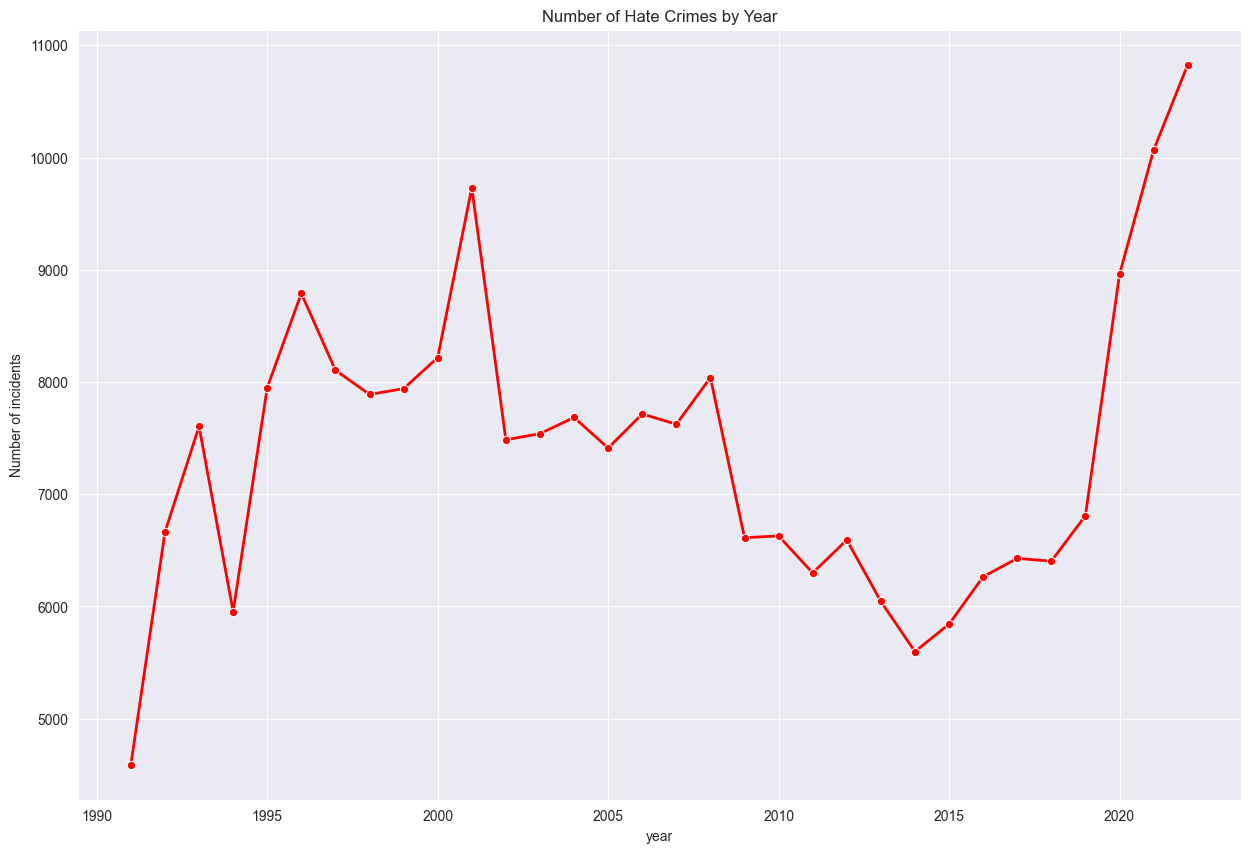

In [24]:
# plot the number of incidents by year
plt.figure(figsize=(15, 10))
sns.lineplot(data=data_year, x='year', y='Number of incidents', linewidth=2, marker='o', color='red')
plt.title('Number of Hate Crimes by Year')
plt.show()

### Rolling Average of Hate Crimes by Year

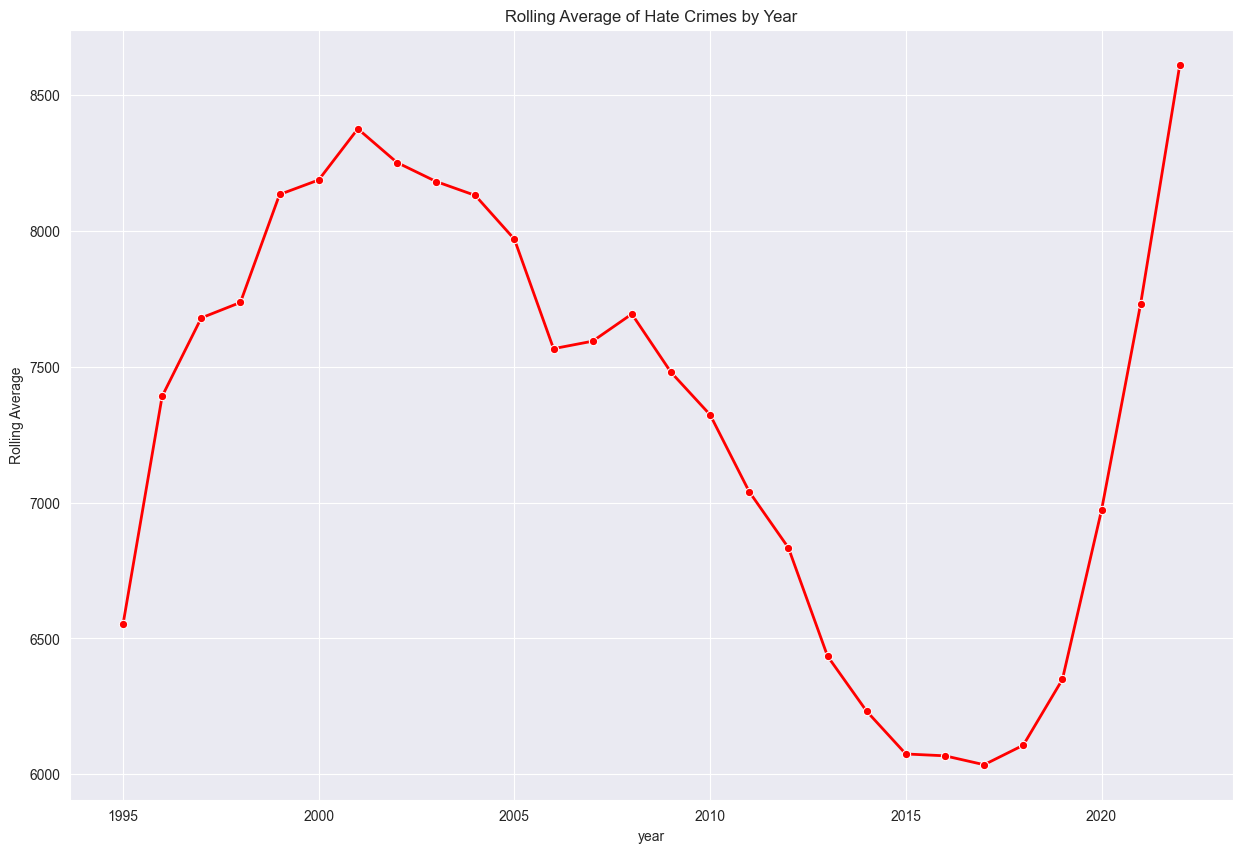

In [25]:
# Plot the rolling average of hate crimes by year
plt.figure(figsize=(15, 10))
data_year['Rolling Average'] = data_year['Number of incidents'].rolling(5).mean()
sns.lineplot(data=data_year, x='year', y='Rolling Average', linewidth=2, marker='o', color='red')
plt.title('Rolling Average of Hate Crimes by Year')
plt.show()

### The first order difference of the number of hate crimes by year

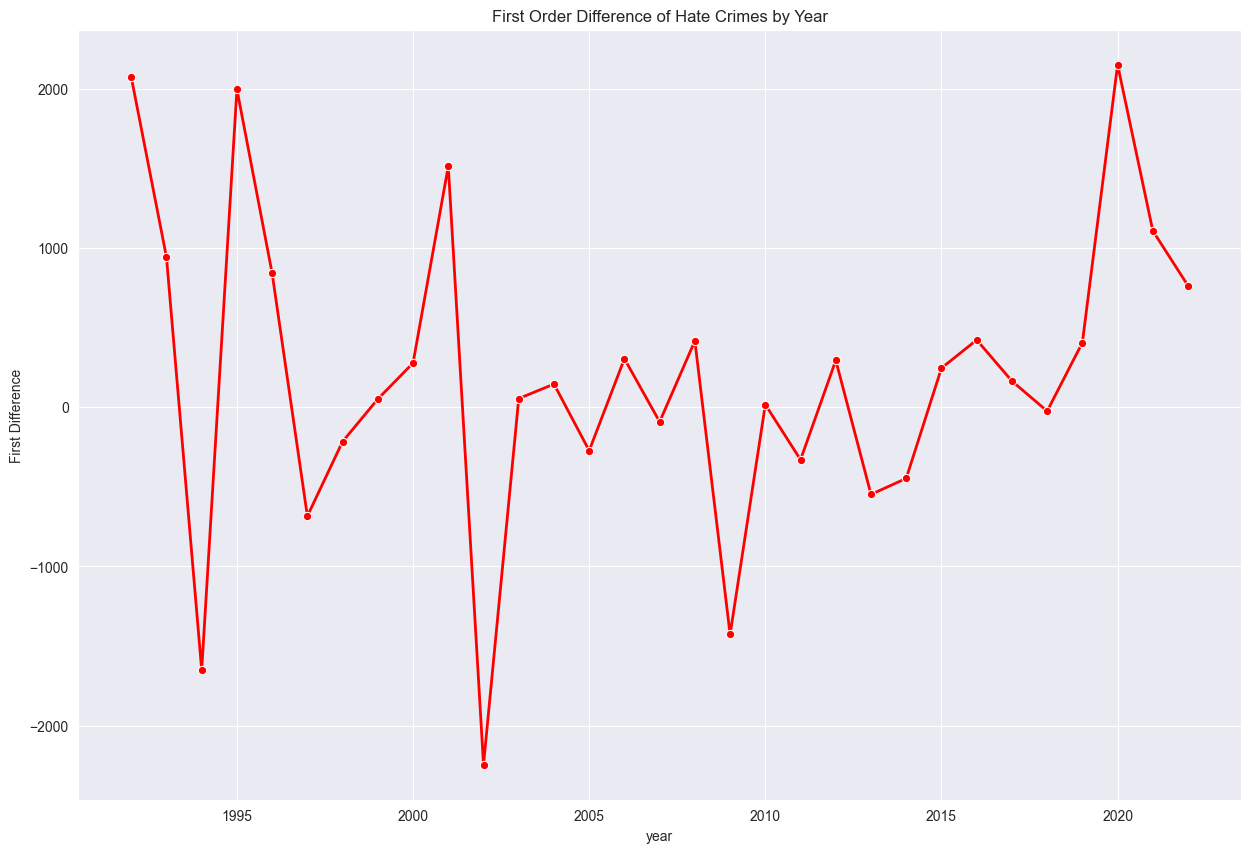

In [26]:
# Plot the first order difference of the number of hate crimes by year
plt.figure(figsize=(15, 10))
data_year['First Difference'] = data_year['Number of incidents'].diff()
sns.lineplot(data=data_year, x='year', y='First Difference', linewidth=2, marker='o', color='red')
plt.title('First Order Difference of Hate Crimes by Year')
plt.show()

### Bar plot of the number of hate crimes by year

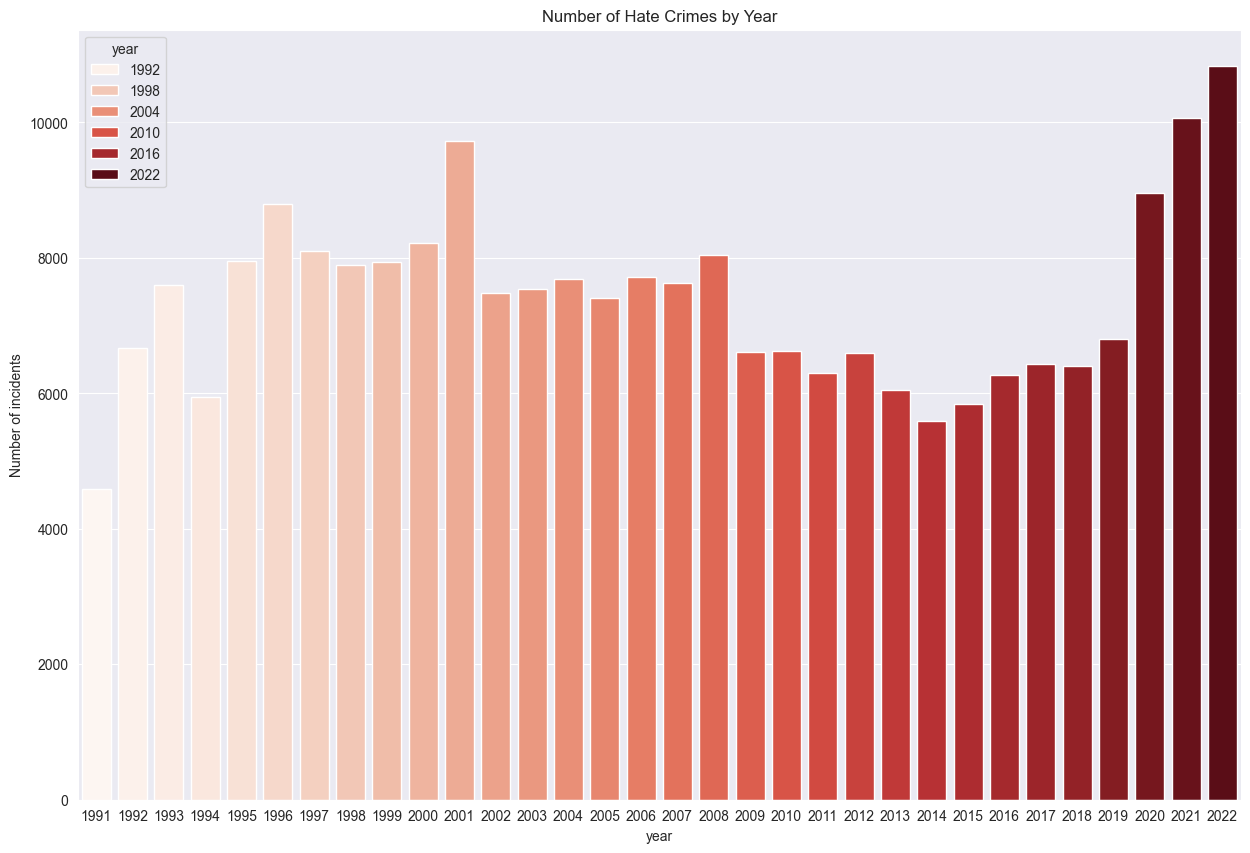

In [27]:
# Plot the number of hate crimes by year
plt.figure(figsize=(15, 10))
sns.barplot(data=data_year, x='year', y='Number of incidents', palette='Reds', hue='year')
plt.title('Number of Hate Crimes by Year')
plt.show()

In [28]:
# plot summary statistics
data_year.describe()

,year,Number of incidents,Rolling Average,First Difference
count,32.000000,32.000000,28.00000,31.000000
mean,2006.500000,7384.031250,7312.25000,201.225806
std,9.380832,1344.617237,813.14512,987.093164
min,1991.000000,4589.000000,6035.00000,-2245.000000
25%,1998.750000,6421.750000,6522.25000,-244.500000
50%,2006.500000,7512.000000,7523.40000,164.000000
75%,2014.250000,7971.500000,8010.10000,592.000000
max,2022.000000,10827.000000,8612.20000,2150.000000


### Forecasting the Number of Hate Crimes by Year

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def find_best_alpha(train, test):
    max_alpha = 1
    alpha = 0.01
    best_alpha = 0
    best_rms = 100
    best_y_hat_avg = test.copy()
    y_hat_avg = test.copy()
    while alpha <= max_alpha:
        pred = []
        ft = pd.DataFrame.ewm(train, span = 10).mean()['Number of incidents'].iloc[-1]
        pred.append(ft)
        for i in range(1,len(test['Number of incidents'])):
            dt = test['Number of incidents'].iloc[i]
            ft_plus_1 = alpha*dt + (1-alpha)*ft
            pred.append(ft_plus_1)
            ft = ft_plus_1
        y_hat_avg['SES'] = pd.Series(pred).values
        rms = sqrt(mean_squared_error(test['Number of incidents'], y_hat_avg.SES))
        if rms < best_rms:
            best_rms = rms
            best_alpha = alpha
            best_y_hat_avg = y_hat_avg.copy()
        alpha += 0.01
    return best_alpha, best_y_hat_avg, best_rms

In [30]:
# Split the data into training and testing sets
train = data_year[data_year['year'] < 2017]
test = data_year[data_year['year'] >= 2017]

Text(0.5, 1.0, 'Training and Testing Sets')

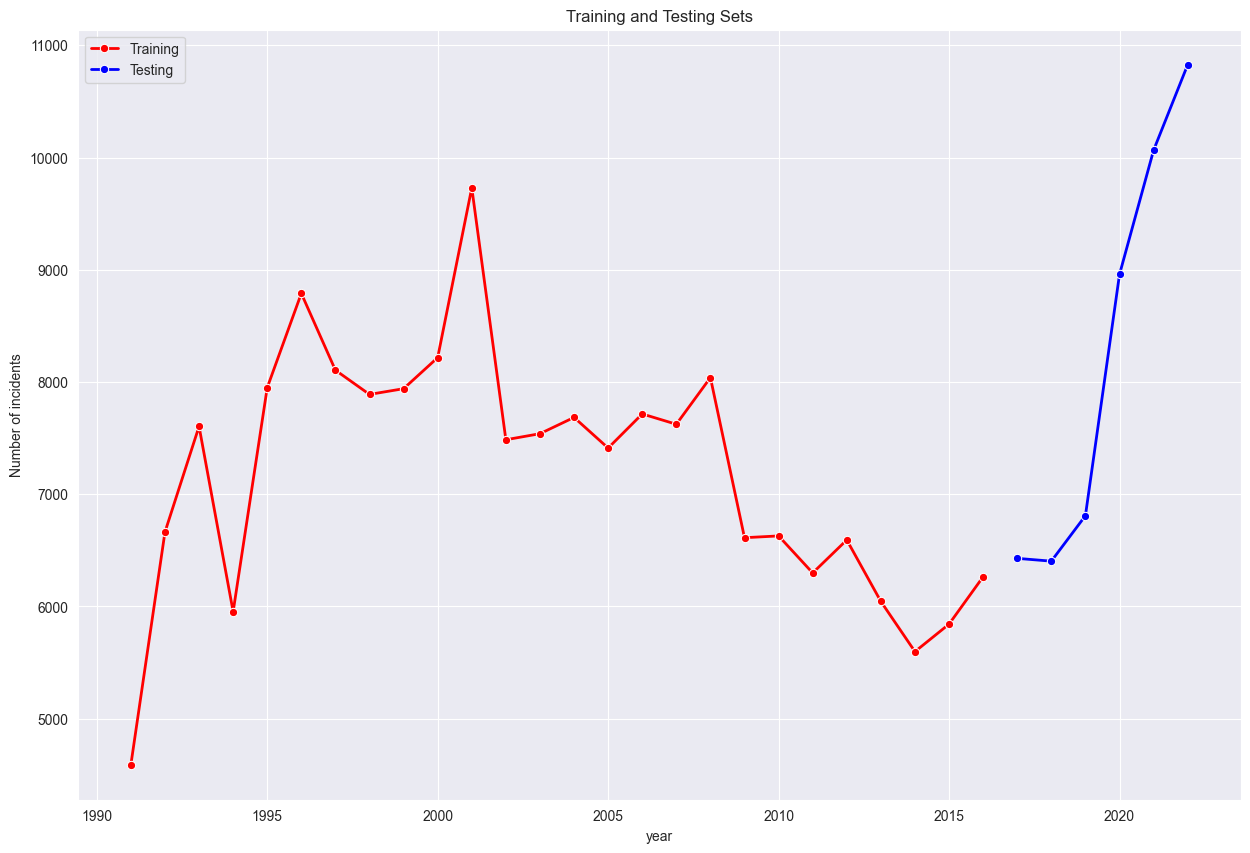

In [31]:
# plot the training and testing sets
plt.figure(figsize=(15, 10))
sns.lineplot(data=train, x='year', y='Number of incidents', linewidth=2, marker='o', color='red', label='Training')
sns.lineplot(data=test, x='year', y='Number of incidents', linewidth=2, marker='o', color='blue', label='Testing')
plt.title('Training and Testing Sets')

In [32]:
# Find the best alpha value
best_alpha, best_y_hat_avg, best_rms = find_best_alpha(train, test)

Text(0.5, 1.0, 'Forecasting the Number of Hate Crimes by Year')

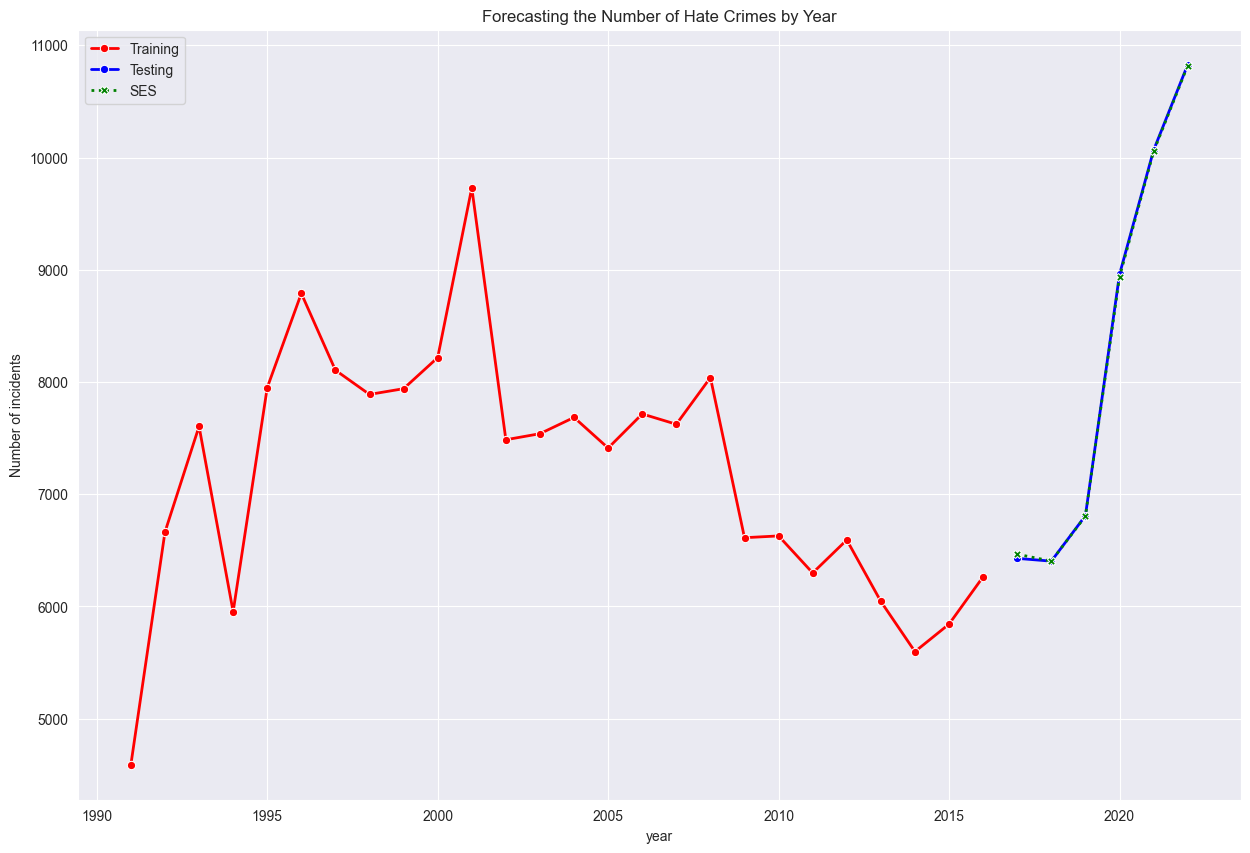

In [35]:
# plot the best alpha value
plt.figure(figsize=(15, 10))
sns.lineplot(data=train, x='year', y='Number of incidents', linewidth=2, marker='o', color='red', label='Training')
sns.lineplot(data=test, x='year', y='Number of incidents', linewidth=2, marker='o', color='blue', label='Testing')
sns.lineplot(data=best_y_hat_avg, x='year', y='SES', linewidth=2, marker='X', color='green', label='SES', linestyle='dotted')
plt.title('Forecasting the Number of Hate Crimes by Year')

In [48]:
# function that would predict the number of crimes given a year
def predict_hate_crimes(year):
    ft = pd.DataFrame.ewm(data_year, span = 10).mean()['Number of incidents'].iloc[-1]
    dt = data_year[data_year['year'] == year]['Number of incidents'].values[0]
    alpha = best_alpha
    ft_plus_1 = alpha*dt + (1-alpha)*ft
    return ft_plus_1

In [49]:
# predict the number of hate crimes for the year 2021
predict_hate_crimes(2021)   

10045.61402034054

In [50]:
# output the actual number of hate crimes for the year 2021
data_year[data_year['year'] == 2021]['Number of incidents'].values[0]

10065